In [ ]:
import pandas as pd
import pm4py
import numpy as np
from pm4py.visualization.petri_net import visualizer

In [ ]:
df = pd.read_csv("C:\\Users\\alex\\PycharmProjects\\process_mining_for_SE\\resources\\total.csv")

In [ ]:
df['size'] = (2*df['additions'] + df['deletions']) / 3

<AxesSubplot:>

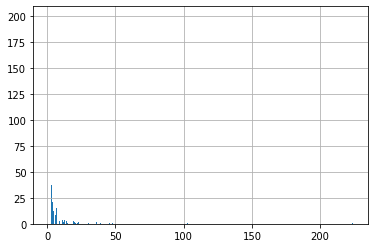

In [ ]:
df['size'].value_counts().hist(bins=500)

In [ ]:
conditions = [
    (df['size'] < 5.0),
    (df['size'] >= 5.0) & (df['size'] < 30.0),
    (df['size'] >= 30.0)
    ]
# create a list of the values we want to assign for each condition
values = ['small', 'medium', 'big']

# create a new column and use np.select to assign values to it using our lists as arguments
df['size_label'] = np.select(conditions, values)

<AxesSubplot:>

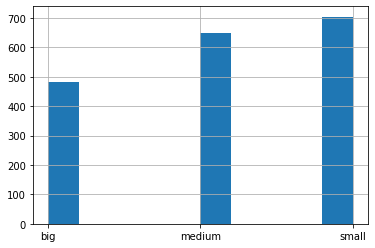

In [ ]:
df['size_label'].hist()

In [ ]:
df['size_label'].value_counts()

small     704
medium    647
big       483
Name: size_label, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,author,date,sha,parent,files_num,additions,deletions,size,size_label
0,0,Erez Shinan,"Fri, 21 Jan 2022 07:51:58 GMT",ee27eb47ddbb24acbecb17f80c3878fe7cb70c01,"['343c22e21802fa19d44cc0fff1a0d8c6f1b07244', '...",6,77,51,68.333333,big
1,1,Patrick Lannigan,"Fri, 21 Jan 2022 07:51:58 GMT",c9c01405a00c24cc2ac518090deee4816b901135,['164642646b6c01e6ba2f0278f4f84344385b2f53'],3,11,33,18.333333,medium
2,2,Patrick Lannigan,"Fri, 21 Jan 2022 07:51:58 GMT",164642646b6c01e6ba2f0278f4f84344385b2f53,['732143a708eeef9e76da992684213deb5ef507df'],3,33,11,25.666667,medium
3,3,Patrick Lannigan,"Fri, 21 Jan 2022 07:51:58 GMT",732143a708eeef9e76da992684213deb5ef507df,['acf2a26329db479f22fa8a6e0570967366a65d99'],1,9,9,9.000000,medium
4,4,Patrick Lannigan,"Fri, 21 Jan 2022 07:51:58 GMT",acf2a26329db479f22fa8a6e0570967366a65d99,['8a8b70d81a16b3bb146d14abf0bad4e2b61a40d7'],2,7,6,6.666667,medium


# Question 1

In [ ]:
def calc_per_day(df):
    res = {}
    for index, row in df.iterrows():
        date = row['date'].date()
        if date in res:
            res[date][0] += (2*row['additions'] + row['deletions']) / 3
            res[date][1] += 1
        else:
            res[date] = [(2*row['additions'] + row['deletions']) / 3, 1]
    return res

In [ ]:
per_day = calc_per_day(df)

In [ ]:
df_1 = pd.DataFrame.from_dict(per_day, orient="index", columns = ["value", "commits_num"])

In [ ]:
df_1 = df_1.sort_index().reset_index()
df_1 = df_1.rename(columns={"index": "date"})

In [ ]:
df_1

,date,value,commits_num
0,2017-02-07,2438.000000,18
1,2017-03-20,5690.000000,100
2,2017-10-31,2782.000000,100
3,2018-02-28,5469.666667,100
4,2018-07-11,4944.000000,100
5,2018-12-12,3286.333333,100
6,2019-04-08,3000.666667,100
7,2019-08-23,6.333333,1
8,2019-09-06,4649.000000,100
9,2019-12-26,21.333333,1


In [ ]:
from matplotlib.pyplot import hist

(array([ 2438.        ,  5690.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
         2782.        ,     0.        ,     0.        ,     0.        ,
         5469.66666667,     0.        ,     0.        ,     0.        ,
            0.        ,  4944.        ,     0.        ,     0.        ,
            0.        ,     0.        ,  3286.33333333,     0.        ,
            0.        ,     0.        ,  3000.66666667,     0.        ,
            0.        ,     0.        ,     0.        ,  4655.33333333,
            0.        ,     0.        ,     0.        ,    21.33333333,
            0.        ,  4404.        ,     0.        ,     0.        ,
            0.        ,  5433.        ,     0.        ,  4046.66666667,
        17121.33333333,  4501.66666667,    27.        ,     0.        ,
         5408.66666667,     0.        ,     0.        ,    55.33333333,
         4640.        ,     0.        ,     0.        ,     0.  

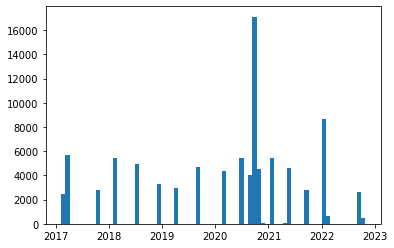

In [ ]:
hist(df_1['date'], weights = df_1['value'], bins=70)

(array([ 18., 100.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,
          0., 100.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,
        100.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0., 101.,   0.,
          0.,   0.,   1.,   0., 100.,   0.,   0.,   0., 101.,   0., 100.,
        100., 100.,   2.,   0., 100.,   0.,   0.,   3., 100.,   0.,   0.,
          0.,  77.,   0.,   0.,   0., 200.,  14.,   0.,   0.,   0.,   0.,
          0.,   0., 100.,  17.]),
 array([17204.        , 17233.82857143, 17263.65714286, 17293.48571429,
        17323.31428571, 17353.14285714, 17382.97142857, 17412.8       ,
        17442.62857143, 17472.45714286, 17502.28571429, 17532.11428571,
        17561.94285714, 17591.77142857, 17621.6       , 17651.42857143,
        17681.25714286, 17711.08571429, 17740.91428571, 17770.74285714,
        17800.57142857, 17830.4       , 17860.22857143, 17890.05714286,
        17919.88571429, 17949.71428571, 17979.54285714, 18009.37142857,
        18039.2   

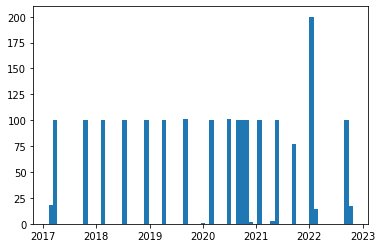

In [ ]:
hist(df_1['date'], weights = df_1['commits_num'], bins=70)

# Question 2

In [ ]:
dataframe = pm4py.format_dataframe(df, case_id='author', activity_key='size_label', timestamp_key='date')
event_log = pm4py.convert_to_event_log(dataframe)

C:\Users\alex\AppData\Local\Temp/ipykernel_2464/1982112674.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(df, case_id='author', activity_key='size_label', timestamp_key='date')
c:\python39\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [ ]:
tree = pm4py.discover_process_tree_inductive(event_log)

C:\Users\alex\AppData\Local\Temp/ipykernel_2464/3914396393.py:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)


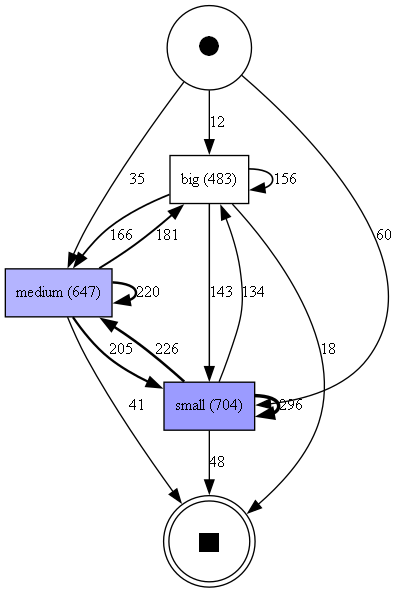

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Question 5

In [ ]:
df['case'] = True
df.head()

,Unnamed: 0,author,date,sha,parent,files_num,additions,deletions,size,size_label,case,case:concept:name,concept:name,time:timestamp
0,0,Erez Shinan,2022-01-21 07:51:58+00:00,ee27eb47ddbb24acbecb17f80c3878fe7cb70c01,"['343c22e21802fa19d44cc0fff1a0d8c6f1b07244', '...",6,77,51,68.333333,big,True,True,big,2022-01-21 07:51:58+00:00
1,1,Patrick Lannigan,2022-01-21 07:51:58+00:00,c9c01405a00c24cc2ac518090deee4816b901135,['164642646b6c01e6ba2f0278f4f84344385b2f53'],3,11,33,18.333333,medium,True,True,medium,2022-01-21 07:51:58+00:00
2,2,Patrick Lannigan,2022-01-21 07:51:58+00:00,164642646b6c01e6ba2f0278f4f84344385b2f53,['732143a708eeef9e76da992684213deb5ef507df'],3,33,11,25.666667,medium,True,True,medium,2022-01-21 07:51:58+00:00
3,3,Patrick Lannigan,2022-01-21 07:51:58+00:00,732143a708eeef9e76da992684213deb5ef507df,['acf2a26329db479f22fa8a6e0570967366a65d99'],1,9,9,9.000000,medium,True,True,medium,2022-01-21 07:51:58+00:00
4,4,Patrick Lannigan,2022-01-21 07:51:58+00:00,acf2a26329db479f22fa8a6e0570967366a65d99,['8a8b70d81a16b3bb146d14abf0bad4e2b61a40d7'],2,7,6,6.666667,medium,True,True,medium,2022-01-21 07:51:58+00:00


In [ ]:
all_repo_dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='size_label', timestamp_key='date')
all_repo_event_log  = pm4py.convert_to_event_log(all_repo_dataframe)

C:\Users\alex\AppData\Local\Temp/ipykernel_9408/458174612.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  all_repo_dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='size_label', timestamp_key='date')
c:\python39\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


C:\Users\alex\AppData\Local\Temp/ipykernel_9408/482669761.py:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(all_repo_event_log)


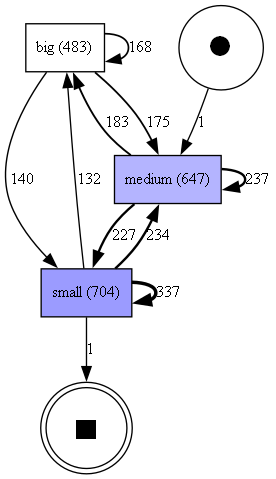

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(all_repo_event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)